In [1]:
# Use this code if using Colab to run Selenium
# Make sure to go to Runtime -> Change runtime and set GPU as hardware accelerator
# !kill -9 -1 # Use this line to delete this VM and start a new one.
# The above line deletes all files and folders from the current VM and allocates a new one.

#Selenium is an open-source tool that automates web browsers.
# !pip install selenium
# !apt-get -q update   #Used to handle installation and removal of softwares and libraries
# !apt install -yq chromium-chromedriver #ChromeDriver is a separate executable that Selenium WebDriver uses to control Chrome.
# !cp /usr/lib/chromium-browser/chromedriver /usr/bin

#Necessary libraries to be imported
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from selenium.webdriver.common.by import By

#WebDriver is a browser automation framework that works with open source APIs.
#The framework operates by accepting commands, sending those commands to a browser, and interacting with applications.
chrome_options = webdriver.ChromeOptions()

#Headless means running chrome with chrome.exe
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [2]:
# Import required libraries
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time

# Initialize the WebDriver
wd = webdriver.Chrome()

# Base URL
base_url = "https://www.ratebeer.com/top-beers"

# Visit the base URL
wd.get(base_url)
time.sleep(2)  # Wait for the page to load

# Extract beer links from the table
beer_elements = wd.find_elements(By.CSS_SELECTOR, 'a.MuiTypography-root[href^="/beer/"]')
beer_element_dict = {}
print(f"Number of beers found: {len(beer_elements)}")
# for beer in beer_elements:
#     print(beer.text)
#     print(beer.get_attribute('href'))
for beer in beer_elements:
    beer_url = str(beer.get_attribute('href'))
    beer_name = str(beer.text).split('\n')[0]
    if len(beer_name)>1:
        beer_element_dict[beer_name] = beer_url

print(beer_element_dict)

# Close the WebDriver
wd.quit()

Number of beers found: 102
{"Beer Gods' Top 50 Beers": 'https://www.ratebeer.com/beer/top-50-beer-gods/', 'Toppling Goliath Kentucky Brunch': 'https://www.ratebeer.com/beer/toppling-goliath-kentucky-brunch/166019/', 'Närke Kaggen Stormaktsporter': 'https://www.ratebeer.com/beer/naerke-kaggen-stormaktsporter/58057/', "Schramm's The Heart of Darkness": 'https://www.ratebeer.com/beer/schramm-s-the-heart-of-darkness/231441/', 'Westvleteren 12': 'https://www.ratebeer.com/beer/westvleteren-12/4934/', 'B. Nektar Ken Schramm Signature Series - The Heart of Darkness': 'https://www.ratebeer.com/beer/b-nektar-ken-schramm-signature-series-the-heart-of-darkness/106749/', 'Cigar City Pilot Series Dragonfruit Passion Fruit Berliner Weisse': 'https://www.ratebeer.com/beer/cigar-city-pilot-series-dragonfruit-passion-fruit-berliner-weisse/140581/', 'Goose Island Bourbon County Stout - Rare 2010': 'https://www.ratebeer.com/beer/goose-island-bourbon-county-stout-rare-2010/116684/', "Cigar City Hunahpu's I

In [11]:
# Initialize the WebDriver
wd = webdriver.Chrome()

# List to store comments and ratings
comments_list = []

# Loop through each beer link and scrape the necessary data
beer_element_dict_temp = dict(list(beer_element_dict.items())[1:])

for beer_name, beer_url in beer_element_dict_temp.items():  # Adjust this range to scrape more beer pages
    beer_href = beer_url  # Extract the href attribute
    beer_name = beer_name  # Get the beer name

    # Print the beer name and URL
    print(f"Scraping beer: {beer_name}, URL: {beer_href}")

    # Visit the beer's page
    wd.get(beer_href)
    time.sleep(5)  # Wait for the beer page to load

    try:
        # Wait for the drop-down to be visible and clickable
        wait = WebDriverWait(wd, 5)

        dropdown_element = wait.until(
            EC.element_to_be_clickable((By.XPATH, '//div[@role="button" and @aria-haspopup="listbox"]'))
        )

        # Click the drop-down to open the options
        dropdown_element.click()

        # Select the "100" option from the drop-down
        option_100 = wait.until(
            EC.element_to_be_clickable((By.XPATH, '//li[text()="100"]'))
        )
        option_100.click()

        # Wait for the page to reload after changing the number of rows
        time.sleep(2)  # Adjust the sleep time as necessary depending on the page reload speed

        # # Scrape comments and ratings
        has_next_page = True
        page_number = 1
        while has_next_page:
            try:
                
                # Find all the review divs on the page
                full_comments_divs = wd.find_elements(By.XPATH, '//div[contains(@class, "py-4")]')
                num_of_page_comments = min(len(full_comments_divs), 100)
                print(f"--------inside first big div of table--------Page Number : {page_number} & Comments: {num_of_page_comments} --------")
                
                for i in range(1, num_of_page_comments+1):  # Looping through the first 100 comments
                    try:
                        # Construct the dynamic XPath for the comment
                        comment_xpath = f'//*[@id="root"]/div[2]/div[2]/div/div/div/div[2]/div[1]/div[2]/div/div[3]/div[{i}]/div/section[2]/div[1]/div/div[1]/div'
                        comment_show_more_xpath = f'//*[@id="root"]/div[2]/div[2]/div/div/div/div[2]/div[1]/div[2]/div/div[3]/div[{i}]/div/section[2]/div[1]/div/div[1]'

                        rating_xpath = f'//*[@id="root"]/div[2]/div[2]/div/div/div/div[2]/div[1]/div[2]/div/div[3]/div[{i}]/div/section[1]/div[2]/div[2]/div[2]/span[1]'
                        rating_xpath_missing_user_country = f'//*[@id="root"]/div[2]/div[2]/div/div/div/div[2]/div[1]/div[2]/div/div[3]/div[{i}]/div/section[1]/div[2]/div/div[2]/span[1]'
                                
                        show_more_xpath = f'//*[@id="root"]/div[2]/div[2]/div/div/div/div[2]/div[1]/div[2]/div/div[3]/div[{i}]/div/section[2]/div[1]/div/button/span[1]'


                        # Extract the comment
                        comment_element = wd.find_element(By.XPATH, comment_xpath)

                        # ----------------------------------------------------------------------------
                        
                        try:
                            # Find the "Show more" button using a combined condition for class and text
                            # show_more_button = comment_element.find_element(By.XPATH, show_more_xpath)
                            show_more_button = wait.until(
                                        EC.element_to_be_clickable((By.XPATH, show_more_xpath))
                                        )           
                            show_more_button.click()
                            comment_xpath = comment_show_more_xpath
                            time.sleep(1)  # Wait for the full comment to load

                        except Exception as e:
                            # print(f"No 'Show more' button found for comment {i}: {e}")
                            print(f"No 'Show more' button found for comment {i}")
                    
                        # ----------------------------------------------------------------------------

                        comment_element = wd.find_element(By.XPATH, comment_xpath)
                        comment_text = comment_element.text

                        try:
                            # Extract the rating
                            rating_element = wd.find_element(By.XPATH, rating_xpath)
                            # rating_text = rating_element.text
                        except:
                            # Extract the rating for comments for missing user country
                            rating_element = wd.find_element(By.XPATH, rating_xpath_missing_user_country)
                            print("comment", i, "has no user country.")
                        rating_text = rating_element.text

                        # Append the data to the comments_list
                        comments_list.append({
                            'beer_name': beer_name,
                            'page_&_comment_number': (page_number,i),
                            'rating': rating_text,
                            'comment': comment_text
                        })
                        print(f"---------Comment {i} extracted.-------")

                    except Exception as e:
                        print(f"Error extracting comment {i} because not on website")
                        # print(f"Error extracting comment {i}: {e}")
                        
                # Check for the "Next" button and click it if available
                next_button = wd.find_element(By.XPATH, '//button[contains(@aria-label, "Next page")]')
                if (next_button.is_enabled()) and (page_number < 2):
                    next_button.click()
                    print(f"--------Done Scrapping for Page Number : {page_number}------")
                    time.sleep(2)  # Wait for the next page to load
                    page_number += 1
                else:
                    print(f"--------Done Scrapping for Page Number : {page_number}------")
                    has_next_page = False
            

            except Exception as e:
                print(f"Error during pagination for {beer_name}: {e}")
                has_next_page = False 

    except Exception as e:
        print(f"Error occurred while scraping {beer_name}: {e}")

# Convert the comments_list to a DataFrame
comments_df = pd.DataFrame(comments_list)

# Save the data to a CSV file
comments_df.to_csv('top_100_comments.csv', index=False)
print("Top 100 comments saved to top_100_comments.csv")

# Close the WebDriver
wd.quit()


Scraping beer: Toppling Goliath Kentucky Brunch, URL: https://www.ratebeer.com/beer/toppling-goliath-kentucky-brunch/166019/
--------inside first big div of table--------Page Number : 1 & Comments: 100 --------
---------Comment 1 extracted.-------
---------Comment 2 extracted.-------
---------Comment 3 extracted.-------
---------Comment 4 extracted.-------
---------Comment 5 extracted.-------
---------Comment 6 extracted.-------
---------Comment 7 extracted.-------
---------Comment 8 extracted.-------
---------Comment 9 extracted.-------
---------Comment 10 extracted.-------
---------Comment 11 extracted.-------
---------Comment 12 extracted.-------
---------Comment 13 extracted.-------
---------Comment 14 extracted.-------
---------Comment 15 extracted.-------
---------Comment 16 extracted.-------
---------Comment 17 extracted.-------
---------Comment 18 extracted.-------
No 'Show more' button found for comment 19
---------Comment 19 extracted.-------
comment 20 has no user country.
-

In [3]:
# import Modules
import csv
import re
import string
from collections import defaultdict
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import io
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
nltk.download('stopwords')
from sklearn import manifold
from sklearn.cluster import DBSCAN
from matplotlib.patches import Ellipse
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# creating the function it check if a row of csv file is header or not used in {remove_header}
def is_header(row):
    """
    Heuristically determine if the row is a header.
    Returns True if the row is likely a header, otherwise False.
    """
    # Check if all elements in the row are strings (this is a heuristic)
    return all(isinstance(item, str) for item in row)

# Step 1: Remove header from the input CSV and create a new file without it
def remove_header(input_file, output_file):
    """
    Reads the input CSV file, removes the header, and writes the remaining rows
    into a new output file.
    """
    with io.open(
    input_file, 'r', newline='', encoding = 'utf-8', errors='ignore') as infile, io.open(
        output_file, 'w', newline='', encoding = 'utf-8', errors='ignore'
        ) as outfile:
        inputs = csv.reader(infile)
        outputs = csv.writer(outfile)

        first_row = next(inputs)  # Read the first row
        
        # Check if the first row is a header
        if not is_header(first_row):
            # If it's not a header, write the first row as data
            outputs.writerow(first_row)

        # Skip the first row (header), then writes to the output file
        for index, row in enumerate(inputs):
            if index >= 0:  # This ensures we skip the header (index 0)
                outputs.writerow(row)
        
    print("Reading the file - ", {input_file})
    print("\nRemoving the header")
    print("\nWriting the file without header to - ", {output_file})
    return
# dependency for function {extract_sentences}
def clean_and_tokenize(sentence, remove_stopwords_flag=True, n_gram=False):
    """
    Cleans a given sentence by removing punctuation and stopwords, converting text to lowercase,
    and tokenizing the remaining words.
    
    If n_gram is specified (e.g., 2 for bigrams, 3 for trigrams), returns n-grams instead of individual words.
    """
    # Get the stopwords for the English language
    if remove_stopwords_flag:
        stop_words = set(stopwords.words('english'))
    else:
        stop_words = set([])

    # Remove punctuation and convert text to lowercase
    sentence = re.sub(f'[{re.escape(string.punctuation)}]', '', sentence.lower())
    
    # Tokenize the sentence
    words = [word for word in sentence.split() if word not in stop_words]
    sentence = ' '.join(words)
    words = word_tokenize(sentence)

    # print(words_vector)
    # Generate n-grams if specified
    if n_gram and n_gram > 1:
        result = [' '.join(words[i:i + n_gram]) for i in range(len(words) - n_gram + 1)]
    else:
        result = words

    return result

# Step 2: Extract and clean sentences from the text
def extract_sentences(file,sentence_column_index=2, remove_stopwords_flag = True, n_gram=False):
    """
    Extracts text data from the third column of the CSV file, splits it into sentences,
    and cleans each sentence by removing punctuation and stopwords.
    """
    sentences_clean=[]
    with io.open(file, 'r', newline='', encoding = 'utf-8', errors='ignore') as infile:
        inputs = csv.reader(infile)
        
        for index, row in enumerate(inputs):
            # Split the text into sentences based on punctuation (.?!)
            # Clean and tokenize each sentence
            comment = row[sentence_column_index]
            cleaned_tokens = clean_and_tokenize(comment, remove_stopwords_flag, n_gram)
            if cleaned_tokens:  # Avoid adding empty sentences
                    sentences_clean.append(cleaned_tokens)
            
    print("\nReading the file - ",{file})
    print("\nCleaning and tokenizing each sentence into given output list.")
    # print("sentences_clean_list count",len(sentences_clean))
    return sentences_clean

# Step 3: Calculate word frequencies -> helper function for {write_word_frequencies()}
def calculate_word_frequencies(comment_list, frequency_dict = {}, sentence_containing_word_flag = False):
    """
    Calculates the frequency of each word in the given list of cleaned sentences.
    """
    if sentence_containing_word_flag:
        unique_comment_list = list(set(comment_list))
        for token in unique_comment_list:
            try:
                frequency_dict[token] += 1
            except:
                frequency_dict[token] = 1
                
    else:
        for token in comment_list:
            try:
                frequency_dict[token] += 1
            except:
                frequency_dict[token] = 1

    return frequency_dict

# Step 4: Write word frequencies to CSV
def write_word_frequencies(clean_token_list, output_file, sentence_containing_word_flag = False):
    """
    Writes the word frequencies to the specified CSV file.
    """
    corpus_freq_dict = {}

    for sentence_token in clean_token_list:
        corpus_freq_dict = calculate_word_frequencies(sentence_token, corpus_freq_dict, sentence_containing_word_flag)
    
    print("\nCalculated corpus token frequncy for ", {len(corpus_freq_dict.keys())}, " tokens.")

    # Sort the dictionary by values in descending order
    corpus_freq_dict = dict(sorted(corpus_freq_dict.items(), key=lambda item: item[1], reverse=True))

    # writing final freq dictionary as a csv
    with open(output_file, 'w', newline='', encoding='utf-8', errors='ignore') as csvfile:
        writer = csv.writer(csvfile)
        
        # Write each key-value pair as a row in the CSV
        for key, value in corpus_freq_dict.items():
            writer.writerow([key, value])
    
    print(f"Word frequencies written to {output_file}")
    return

def get_lift(top_10_brand_df, clean_token_list, dis, word_freq_output):

    word_pair_list= []
    word_pair_list.extend(list(combinations(top_10_brand_df, 2)))

    count_df = pd.read_csv(word_freq_output,header=None)

    # Create an empty matrix for all unique words
    lift_values = []
    lift_matrix = pd.DataFrame(index=top_10_brand_df, columns=top_10_brand_df, data=0.0)

    for w1, w2 in word_pair_list:
        w1_w2_count_co_occurance = co_occurance_freq(w1, w2, clean_token_list, dis)
        w1_count = int(count_df[count_df[0]==w1][1].iloc[0])
        w2_count = int(count_df[count_df[0]==w2][1].iloc[0])
        total_sentences = len(clean_token_list)
        lift_value = (total_sentences * w1_w2_count_co_occurance) / (w1_count * w2_count)
        lift_matrix.loc[w1,w2] = lift_value
        lift_values.append([w1,w2,lift_value])

        print(f"\n{'-' * 50}")
        print(f"LIFT CALCULATION FOR: {w1} and {w2}")
        print(f"Word Freq for {w1} : {w1_count}")
        print(f"Word Freq for {w2} : {w2_count}")
        print(f"Co-occurrence (word_pair_freq): {w1_w2_count_co_occurance}")
        print(f"Lift Value: {lift_value}")
        print(f"{'-' * 50}\n")

    return lift_matrix, lift_values

def heatmap(df):
    plt.figure(figsize=(8, 6))
    sns.heatmap(df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title('Heatmap')
    plt.show()
    return

def calculate_distance_btw_words(post, word1, word2):
    """
    Calculate the minimum distance between two words in a post.
    The distance is based on word positions.
    """
    word1_positions = [i for i, word in enumerate(post) if word == word1]
    word2_positions = [i for i, word in enumerate(post) if word == word2]

    if not word1_positions or not word2_positions:
        return float('inf')  # If either word is missing, return infinity

    # Calculate all distances and return the minimum
    return min(abs(pos1 - pos2) for pos1 in word1_positions for pos2 in word2_positions)

def co_occurance_freq(word1, word2, clean_token_list, distance):
    coorrence_count = 0
    for sentence_tokens in clean_token_list:
        if (word1 in sentence_tokens) & (word2 in sentence_tokens):
            min_dis_btw_word = calculate_distance_btw_words(sentence_tokens, word1, word2)
            if min_dis_btw_word <= distance:
                coorrence_count += 1

    return coorrence_count








[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pranvgarg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
def task_b():
    # TASK b  
    input_filename = 'final_comments.csv'  # Input file
    without_header_file = 'task_b/without_header_file_task_b.csv'  # Intermediate file without the column header
    word_freq_output = 'task_b/word_freq_task_b.csv'  # Output file for word frequencies
    lift_matrix_filename_output = "task_b/lift_matrix_task_b.csv"
    distance_btw_words = 1000000000

    # removing the header from input file
    remove_header(input_filename, without_header_file) # commenting now coz sample file does not have header

    clean_token_list = extract_sentences(without_header_file, sentence_column_index=3, remove_stopwords_flag = True)

    # writting the word freq file 
    write_word_frequencies(clean_token_list, word_freq_output, sentence_containing_word_flag = False)

    # getting top 10 brands and frq in a df
    # top_10_brand_list_beer = []
    top_attribute_list = [ "aroma","sweet","dark","malt","taste","honey","flavor","strong","woody","gentle","bourbon"]
    
    # getting the lift matrix
    lift_matrix,lift_values = get_lift(top_attribute_list, clean_token_list, distance_btw_words, word_freq_output)

    #GEtting the lift mtx format for mds
    # top_10_brand_list.extend(top_attribute_list)
    # lift_matrix_temp,lift_values_temp = get_lift(top_10_brand_list, clean_token_list, distance_btw_words, word_freq_output)

    #writing the lift matrix to output files to csv 
    lift_matrix.to_csv(lift_matrix_filename_output, index=True)

    heatmap(lift_matrix)
    
    return

Reading the file -  {'final_comments.csv'}

Removing the header

Writing the file without header to -  {'task_b/without_header_file_task_b.csv'}

Reading the file -  {'task_b/without_header_file_task_b.csv'}

Cleaning and tokenizing each sentence into given output list.

Calculated corpus token frequncy for  {25072}  tokens.
Word frequencies written to task_b/word_freq_task_b.csv

--------------------------------------------------
LIFT CALCULATION FOR: aroma and sweet
Word Freq for aroma : 3434
Word Freq for sweet : 3563
Co-occurrence (word_pair_freq): 1431
Lift Value: 0.7648940258474181
--------------------------------------------------


--------------------------------------------------
LIFT CALCULATION FOR: aroma and dark
Word Freq for aroma : 3434
Word Freq for dark : 3533
Co-occurrence (word_pair_freq): 1272
Lift Value: 0.6856791305077462
--------------------------------------------------


--------------------------------------------------
LIFT CALCULATION FOR: aroma and malt
Wo

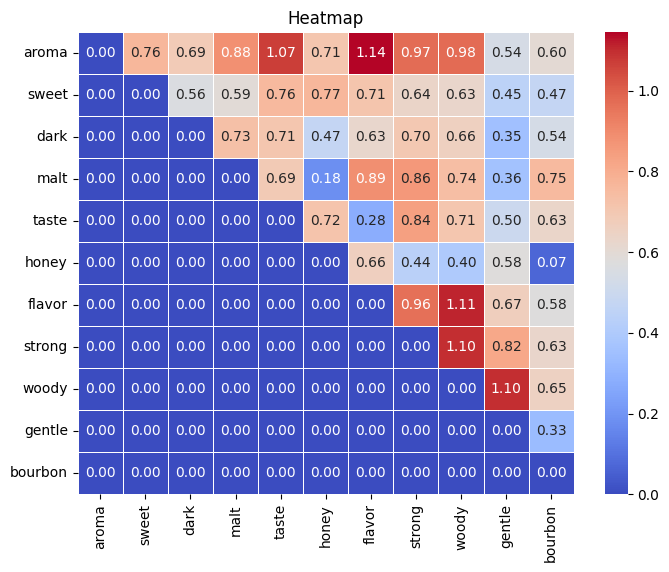

In [7]:
task_b()

In [ ]:
def task_f():
    # TASK F
    # call everythung here  
    # input_filename = 'messages.csv'  # Input file
    without_header_file = 'task_f/without_header_file_task_f.csv'  # Intermediate file without the column header
    word_freq_output = 'task_c/word_freq_task_c.csv'  # Output file for word frequencies
    distance_btw_words = 1000000000
    lift_matrix_filename_output = "task_f/lift_matrix_task_f.csv"
    lift_matrix_filename_output_temp = "task_f/lift_matrix_task_f_temp.csv"
    car_model_brand = 'car_models_and_brands.csv'
    find_replace_input_filename = 'task_f/find_replace_input_filename_task_f.csv'

    # removing the header from input file
    remove_header(input_filename, without_header_file)
    
    
    # brand_list = list(load_replacements(car_model_brand).values())
    clean_token_list = extract_sentences(find_replace_input_filename, sentence_column_index=0, remove_stopwords_flag = False) 

    # getting top 10 brands and frq in a df
    top_10_brand_list = ['bmw', 'audi', 'acura', 'infiniti', 'cadillac']
    top_attribute_list = [
    "price",
    "performance",
    "driving",
    "luxury",
    "engine",
    "tech"
    ]
    
    # getting the lift matrix
    lift_matrix,lift_values = get_lift_task_f(top_10_brand_list,top_attribute_list, clean_token_list, distance_btw_words, word_freq_output)

    #GEtting the lift mtx format for mds
    # top_10_brand_list.extend(top_attribute_list)
    # lift_matrix_temp,lift_values_temp = get_lift(top_10_brand_list, clean_token_list, distance_btw_words, word_freq_output)

    #writing the lift matrix to output files to csv 
    lift_matrix.to_csv(lift_matrix_filename_output, index=True)

    #writing the lift matrix to output files to csv 
    lift_matrix_temp.to_csv(lift_matrix_filename_output_temp, index=True)

    heatmap(lift_matrix)
